In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
#independent features
X=pd.DataFrame(iris['data'], columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [12]:
#dependent feature
y=iris['target']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [23]:
## apply Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()

In [24]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.3181818181818182, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.22727272727272727, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4090909090909091, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.18181818181818182, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.2727272727272727, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.45454545454545453, 0.5, 'x[2] <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.36363636363636365, 0.35714285714285715, 'x[1] <= 2.9\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.2727272727272727, 0.21428571428571427, 'x[3] <= 1.55\ngini = 0.444\nsamples = 3\nvalue

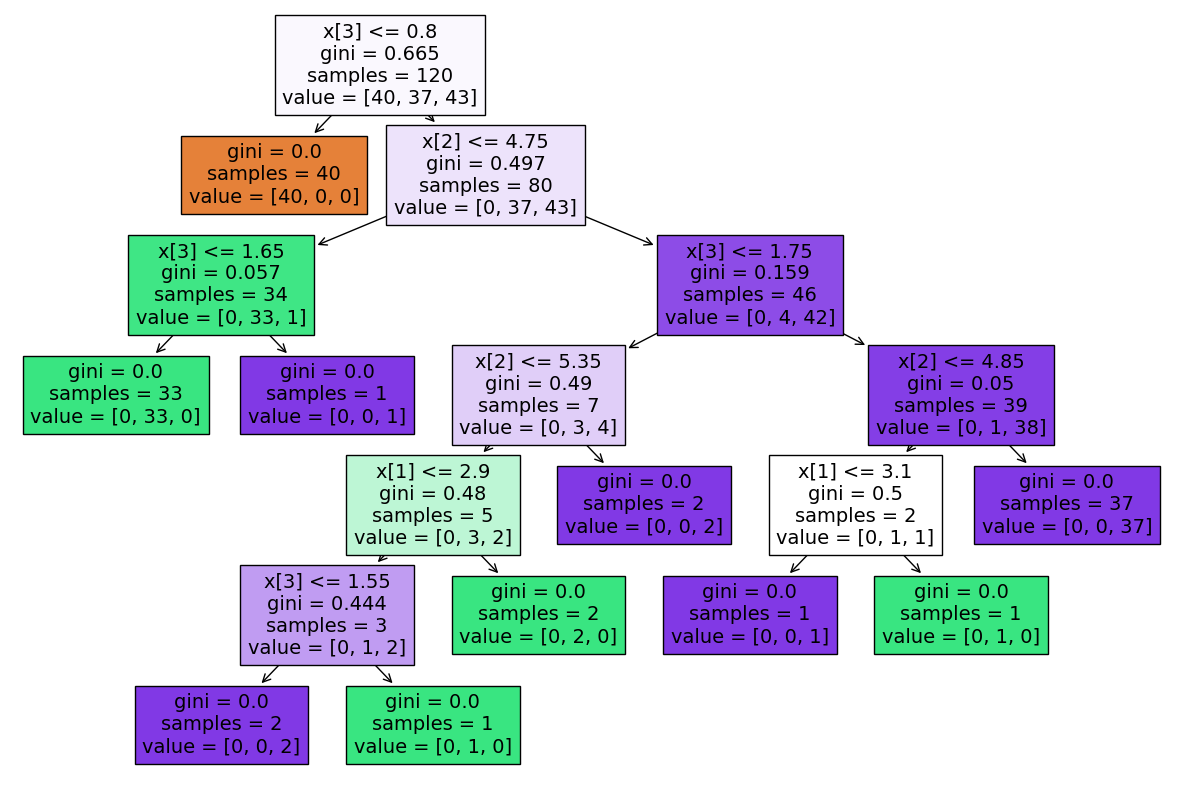

In [25]:
#visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [26]:
y_pred=treeclassifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[10  0  0]
 [ 0 11  0]
 [ 0  2  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.85      1.00      0.92        11
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



## Decision Tree Classifier Prepruning and Hyperparameter Tuning

In [30]:
params={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6],
    'max_features':['auto','sqrt','log2']
}

In [31]:
from sklearn.model_selection import GridSearchCV

In [34]:
treeclassifier=DecisionTreeClassifier()

In [35]:
grid=GridSearchCV(treeclassifier, params, refit=True, cv=5, verbose=2, scoring="accuracy" )

In [37]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, max_features=auto, splitter=random; total time=   0.0s
[CV] END criterio

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_featu

/Users/nithyasreekusakula/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nithyasreekusakula/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nithyasreekusakula/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/nithyasreekusakula/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_par

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [38]:
y_pred=grid.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
